In [ ]:
# Import required libraries
import pandas as pd # for data management as dataframe
import numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting
from scipy.stats import spearmanr # for spearman's correlation
import seaborn as sns # for heatmap
from scipy.optimize import curve_fit # for cost curve fitting
!pip install numpy-financial
import numpy_financial as npf # for npv calculation

In [ ]:
# Mandatory user inputs

# Monte Carlo simulation parameters (assuming uniform distribution of model input)
UB = 0.25 # Uncertainty bracket = ± UB
iter = 10000 # Number of iterations

# Waste amounts (Dry tons/year)
LF_MSW = 6142; "Calculated landfilled municipal solid waste"
LF_FW = LF_MSW * 0.2159; "using USEPA foodwaste % in MSW"; LF_FW = np.random.uniform(LF_FW*(1-UB),LF_FW*(1+UB),iter)
LF_PW = LF_MSW * 0.2305; "using USEPA paperwaste % in MSW"; LF_PW = np.random.uniform(LF_PW*(1-UB),LF_PW*(1+UB),iter)
LF_YW = LF_MSW * 0.1211; "using USEPA yardwaste % in MSW"; LF_YW = np.random.uniform(LF_YW*(1-UB),LF_YW*(1+UB),iter)
LF_WW = LF_MSW * 0.0619; "using USEPA woodwaste % in MSW"; LF_WW = np.random.uniform(LF_WW*(1-UB),LF_WW*(1+UB),iter)
LF_MSS = 616; "Calculated landfilled municipal sewage sludge"; LF_MSS = np.random.uniform(LF_MSS*(1-UB),LF_MSS*(1+UB),iter)
LA_MSShay = 792; "Calculated landapplied municipal sewage sludge in hayfields"; LA_MSShay = np.random.uniform(LA_MSShay*(1-UB),LA_MSShay*(1+UB),iter)
LA_PLhay = 27653; "Calculated landapplied poultry litter in hayfields"; LA_PLhay = np.random.uniform(LA_PLhay*(1-UB),LA_PLhay*(1+UB),iter)
LA_PLcorn = 25372; "Calculated landapplied poultry litter in cornfields"; LA_PLcorn = np.random.uniform(LA_PLcorn*(1-UB),LA_PLcorn*(1+UB),iter)
LA_PLtrans = 17533; "Calculated transported out poultry litter for land application"; LA_PLtrans = np.random.uniform(LA_PLtrans*(1-UB),LA_PLtrans*(1+UB),iter)
LA_CMhay = 9165; "Calculated landapplied cow manure in hayfields"; LA_CMhay = np.random.uniform(LA_CMhay*(1-UB),LA_CMhay*(1+UB),iter)

# Distance travelled (Miles/year)
LF_dist = 720; "Calculated distance travelled for landfilling municipal solid waste and  sewage sludge"; LF_dist = np.random.uniform(LF_dist*(1-UB),LF_dist*(1+UB),iter)
LA_MSShay_dist = 12; "Calculated distance travelled for landapplying  sewage sludge in hayfields"; LA_MSShay_dist = np.random.uniform(LA_MSShay_dist*(1-UB),LA_MSShay_dist*(1+UB),iter)
LA_PLcorn_dist = 54; "Calculated distance travelled for landapplying poultry litter in cornfields"; LA_PLcorn_dist = np.random.uniform(LA_PLcorn_dist*(1-UB),LA_PLcorn_dist*(1+UB),iter)
LA_PLtrans_dist = 50; "Calculated distance travelled for landapplying poultry litter out of watershed"; LA_PLtrans_dist = np.random.uniform(LA_PLtrans_dist*(1-UB),LA_PLtrans_dist*(1+UB),iter)
AD_dist = 240; "Calculated distance travelled for anaerobic digestion"; AD_dist = np.random.uniform(AD_dist*(1-UB),AD_dist*(1+UB),iter)

# Cost inputs
Fuel_cost = 4.5; "in $/gallon diesel price in WV in 2022"; Fuel_cost = np.random.uniform(Fuel_cost*(1-UB),Fuel_cost*(1+UB),iter)
Truck_wage = 20; "in $/hour diesel-powered short-haul trucks in WV in 2022"; Truck_wage = np.random.uniform(Truck_wage*(1-UB),Truck_wage*(1+UB),iter)
Truck_speed = 55; "in miles/hour diesel-powered short-haul trucks in WV in 2022"; Truck_speed = np.random.uniform(Truck_speed*(1-UB),Truck_speed*(1+UB),iter)
LF_wage_rate = 46; "in $/ton using USEPA WARM landfill cost factors"; LF_wage_rate = np.random.uniform(LF_wage_rate*(1-UB),LF_wage_rate*(1+UB),iter)
LF_disposal_rate = 53.3; "in $/ton using WV Solid Waste Management Board landfill disposal rate schedule in 2022"; LF_disposal_rate = np.random.uniform(LF_disposal_rate*(1-UB),LF_disposal_rate*(1+UB),iter)
Urea_cost = 650; "in $/ton in 2022"; Urea_cost = np.random.uniform(Urea_cost*(1-UB),Urea_cost*(1+UB),iter)
Lime_cost = 12; "in $/ton in 2022"; Lime_cost = np.random.uniform(Lime_cost*(1-UB),Lime_cost*(1+UB),iter)
Alum_cost = 386; "in $/ton in 2022"; Alum_cost = np.random.uniform(Alum_cost*(1-UB),Alum_cost*(1+UB),iter)
Elec_rate = 0.0705; "in $/kWh from USEIA average electricity price for industrial use in WV"; Elec_rate = np.random.uniform(Elec_rate*(1-UB),Elec_rate*(1+UB),iter)
Manager_wage = 101410; "in $/year from US Bureau of Labor Statistics for facility manager wages in WV"; Manager_wage = np.random.uniform(Manager_wage*(1-UB),Manager_wage*(1+UB),iter)
Operator_wage = 61170; "in $/year from US Bureau of Labor Statistics for plant and system operator wages in WV"; Operator_wage = np.random.uniform(Operator_wage*(1-UB),Operator_wage*(1+UB),iter)
AD_disposal_rate = 51.55; "in $/ton using WV Solid Waste Management Board landfill disposal rate schedule in 2022 and SB368"; AD_disposal_rate = np.random.uniform(AD_disposal_rate*(1-UB),AD_disposal_rate*(1+UB),iter)
Elec_sale = 0.1276; "in $/kWh from USEIA average electricity price for residential use in WV"; Elec_sale = np.random.uniform(Elec_sale*(1-UB),Elec_sale*(1+UB),iter)
CPI = 1.28; "in fraction using consumer price index based on reference year of 2014 and investment year of 2022"
CCI = 1.65; "in fraction using construction cost index based on reference year of 2014 and investment year of 2022"
irate = 0.07; "in fraction using typical discount rate for anaerobic digestion in literature"; irate = np.random.uniform(irate*(1-UB),irate*(1+UB),iter)
oper_year = 15; "in years using typical investment year for anaerobic digestion in literature"

# Social inputs
HH_elec_consump = 10632; "in kWh/household from US Energy Information Administration"; HH_elec_consump = np.random.uniform(HH_elec_consump*(1-UB),HH_elec_consump*(1+UB),iter)
HH_corn_farm = 24; "in numbers using low income corn farms from USDA cropscape GIS calculations"; HH_corn_farm = np.random.uniform(HH_corn_farm*(1-UB),HH_corn_farm*(1+UB),iter)
HH_PL_farm = 25; "in numbers using low income poultry farms from GIS calculations"; HH_PL_farm = np.random.uniform(HH_PL_farm*(1-UB),HH_PL_farm*(1+UB),iter)
HH_eutrophication = 84; "in numbers using households affected by wastewater discharge from USEPA Environmental Justice Screening tool"; HH_eutrophication = np.random.uniform(HH_eutrophication*(1-UB),HH_eutrophication*(1+UB),iter)
HH_GWP = 121; "in numbers using households affected by economic loss to agricultural value from natural hazards from White House Climate and Economic Justice Screening tool"; HH_GWP = np.random.uniform(HH_GWP*(1-UB),HH_GWP*(1+UB),iter)

# Land application technical inputs (from WVDEP CAFO NPDES Permit information)
Corn_Ndemand = 82; "in kg N/acre corn fertilization N demand"; Corn_Ndemand = np.random.uniform(Corn_Ndemand*(1-UB),Corn_Ndemand*(1+UB),iter)
Corn_Pdemand = 18; "in kg P/acre corn fertilization P demand"; Corn_Pdemand = np.random.uniform(Corn_Pdemand*(1-UB),Corn_Pdemand*(1+UB),iter)
Corn_PL_apprate = 4; "in tons/acre poultry litter application rate for corn fertilization "; Corn_PL_apprate = np.random.uniform(Corn_PL_apprate*(1-UB),Corn_PL_apprate*(1+UB),iter)
Hay_Ndemand = 57; "in kg N/acre hay fertilization N demand"; Hay_Ndemand = np.random.uniform(Hay_Ndemand*(1-UB),Hay_Ndemand*(1+UB),iter)
Hay_Pdemand = 0; "in kg P/acre hay fertilization P demand"; Hay_Pdemand = np.random.uniform(Hay_Pdemand*(1-UB),Hay_Pdemand*(1+UB),iter)
Hay_PL_apprate = 2.3; "in ton/acre from poultry litter application rate for hay fertilization "; Hay_PL_apprate = np.random.uniform(Hay_PL_apprate*(1-UB),Hay_PL_apprate*(1+UB),iter)
Hay_CM_apprate = 12; "in ton/acre from cow manure application rate for hay fertilization "; Hay_CM_apprate = np.random.uniform(Hay_CM_apprate*(1-UB),Hay_CM_apprate*(1+UB),iter)
Hay_MSS_apprate = 1.4; "in ton/acre from sewage sludge application rate for hay fertilization "; Hay_MSS_apprate = np.random.uniform(Hay_MSS_apprate*(1-UB),Hay_MSS_apprate*(1+UB),iter)

# Optional user inputs

# Waste properties
# Moisture content (in fraction)
MC_MSW = 0.490; "Total solids for MSW was obtained from Orner et al. (2021)"; MC_MSW = np.random.uniform(MC_MSW*(1-UB),MC_MSW*(1+UB),iter)
MC_FW = 0.722; "USEPA WARM documentation"; MC_FW = np.random.uniform(MC_FW*(1-UB),MC_FW*(1+UB),iter)
MC_PW = 0.055; "Posada et al. (2016)"; MC_PW = np.random.uniform(MC_PW*(1-UB),MC_PW*(1+UB),iter)
MC_YW = 0.454; "USEPA WARM documentation"; MC_YW = np.random.uniform(MC_YW*(1-UB),MC_YW*(1+UB),iter)
MC_WW = 0.159; "USEPA WARM documentation"; MC_WW = np.random.uniform(MC_WW*(1-UB),MC_WW*(1+UB),iter)
MC_MSS = 0.6; "USEPA Land Application of Sewage Sludge documentation"; MC_MSS = np.random.uniform(MC_MSS*(1-UB),MC_MSS*(1+UB),iter)
MC_PL = 0.346; "WVDEP CAFO NPDES permit documentation"; MC_PL = np.random.uniform(MC_PL*(1-UB),MC_PL*(1+UB),iter)
MC_CM = 0.494; "WVDEP CAFO NPDES permit documentation"; MC_CM = np.random.uniform(MC_CM*(1-UB),MC_CM*(1+UB),iter)

# Carbon content (in fraction)
C_FW = 0.495; "USEPA WARM documentation"; C_FW = np.random.uniform(C_FW*(1-UB),C_FW*(1+UB),iter)
C_PW = 0.383; "Lin et al. (2020)"; C_PW = np.random.uniform(C_PW*(1-UB),C_PW*(1+UB),iter)
C_YW = 0.466; "USEPA WARM documentation"; C_YW = np.random.uniform(C_YW*(1-UB),C_YW*(1+UB),iter)
C_WW = 0.494; "USEPA WARM documentation"; C_WW = np.random.uniform(C_WW*(1-UB),C_WW*(1+UB),iter)
C_MSS = 0.317; "USEPA Land Application of Sewage Sludge documentation"; C_MSS = np.random.uniform(C_MSS*(1-UB),C_MSS*(1+UB),iter)
C_PL = 0.385; "WVDEP CAFO NPDES permit documentation"; C_PL = np.random.uniform(C_PL*(1-UB),C_PL*(1+UB),iter)
C_CM = 0.166; "WVDEP CAFO NPDES permit documentation"; C_CM = np.random.uniform(C_CM*(1-UB),C_CM*(1+UB),iter)

# Nitrogen content (in fraction)
N_FW = 0.038; "USEPA WARM documentation"; N_FW = np.random.uniform(N_FW*(1-UB),N_FW*(1+UB),iter)
N_PW = 0.0016; "Lin et al. (2020)"; N_PW = np.random.uniform(N_PW*(1-UB),N_PW*(1+UB),iter)
N_YW = 0.017; "USEPA WARM documentation"; N_YW = np.random.uniform(N_YW*(1-UB),N_YW*(1+UB),iter)
N_WW = 0.008; "USEPA WARM documentation"; N_WW = np.random.uniform(N_WW*(1-UB),N_WW*(1+UB),iter)
N_MSS = 0.049; "USEPA Land Application of Sewage Sludge documentation"; N_MSS = np.random.uniform(N_MSS*(1-UB),N_MSS*(1+UB),iter)
N_PL = 0.0203; "WVDEP CAFO NPDES permit documentation"; N_PL = np.random.uniform(N_PL*(1-UB),N_PL*(1+UB),iter)
N_CM = 0.0015; "WVDEP CAFO NPDES permit documentation"; N_CM = np.random.uniform(N_CM*(1-UB),N_CM*(1+UB),iter)

# Phosphorus content (in fraction)
P_FW = 0.0051; "USEPA WARM documentation"; P_FW = np.random.uniform(P_FW*(1-UB),P_FW*(1+UB),iter)
P_PW = 0.0002; "Vujović et al. (2016)"; P_PW = np.random.uniform(P_PW*(1-UB),P_PW*(1+UB),iter)
P_YW = 0.002; "USEPA WARM documentation"; P_YW = np.random.uniform(P_YW*(1-UB),P_YW*(1+UB),iter)
P_WW = 0.002; "USEPA WARM documentation"; P_WW = np.random.uniform(P_WW*(1-UB),P_WW*(1+UB),iter)
P_MSS = 0.029; "USEPA Land Application of Sewage Sludge documentation"; P_MSS = np.random.uniform(P_MSS*(1-UB),P_MSS*(1+UB),iter)
P_PL = 0.056; "WVDEP CAFO NPDES permit documentation"; P_PL = np.random.uniform(P_PL*(1-UB),P_PL*(1+UB),iter)
P_CM = 0.007; "WVDEP CAFO NPDES permit documentation"; P_CM = np.random.uniform(P_CM*(1-UB),P_CM*(1+UB),iter)

# Volatile solids content (in fraction)
VS_FW = 0.956; "USEPA WARM documentation"; VS_FW = np.random.uniform(VS_FW*(1-UB),VS_FW*(1+UB),iter)
VS_PW = 0.696; "USDA NRCS agricultural waste characteristics document"; VS_PW = np.random.uniform(VS_PW*(1-UB),VS_PW*(1+UB),iter)
VS_YW = 0.891; "USEPA WARM documentation"; VS_YW = np.random.uniform(VS_YW*(1-UB),VS_YW*(1+UB),iter)
VS_WW = 0.906; "USEPA WARM documentation"; VS_WW = np.random.uniform(VS_WW*(1-UB),VS_WW*(1+UB),iter)
VS_MSS = 0.8; "USEPA Land Application of Sewage Sludge documentation"; VS_MSS = np.random.uniform(VS_MSS*(1-UB),VS_MSS*(1+UB),iter)
VS_PL = 0.7; "USDA NRCS agricultural waste characteristics document"; VS_PL = np.random.uniform(VS_PL*(1-UB),VS_PL*(1+UB),iter)

# CH4 potential (m3/dry)
CH4P_FW = 369.0; "USEPA WARM documentation"; CH4P_FW = np.random.uniform(CH4P_FW*(1-UB),CH4P_FW*(1+UB),iter)
CH4P_PW = 256.0; "USDA NRCS agricultural waste characteristics document"; CH4P_PW = np.random.uniform(CH4P_PW*(1-UB),CH4P_PW*(1+UB),iter)
CH4P_YW = 122.2; "USEPA WARM documentation"; CH4P_YW = np.random.uniform(CH4P_YW*(1-UB),CH4P_YW*(1+UB),iter)
CH4P_WW = 106.4; "USEPA WARM documentation"; CH4P_WW = np.random.uniform(CH4P_WW*(1-UB),CH4P_WW*(1+UB),iter)
CH4P_MSS = 202.3; "USEPA Land Application of Sewage Sludge documentation"; CH4P_MSS = np.random.uniform(CH4P_MSS*(1-UB),CH4P_MSS*(1+UB),iter)
CH4P_PL = 151.3; "USDA NRCS agricultural waste characteristics document"; CH4P_PL = np.random.uniform(CH4P_PL*(1-UB),CH4P_PL*(1+UB),iter)

# Percent of final CH4 yield reached (in fraction)
CH4Y_FW = 0.9; "USEPA WARM documentation"; CH4Y_FW = np.random.uniform(CH4Y_FW*(1-UB),CH4Y_FW*(1+UB),iter)
CH4Y_PW = 0.9; "USEPA WARM documentation"; CH4Y_PW = np.random.uniform(CH4Y_PW*(1-UB),CH4Y_PW*(1+UB),iter)
CH4Y_YW = 0.633; "USEPA WARM documentation"; CH4Y_YW = np.random.uniform(CH4Y_YW*(1-UB),CH4Y_YW*(1+UB),iter)
CH4Y_WW = 0.5; "USEPA WARM documentation"; CH4Y_WW = np.random.uniform(CH4Y_WW*(1-UB),CH4Y_WW*(1+UB),iter)
CH4Y_MSS = 0.5; "USEPA WARM documentation"; CH4Y_MSS = np.random.uniform(CH4Y_MSS*(1-UB),CH4Y_MSS*(1+UB),iter)
CH4Y_PL = 0.5; "USEPA WARM documentation"; CH4Y_PL = np.random.uniform(CH4Y_PL*(1-UB),CH4Y_PL*(1+UB),iter)

# Volatile solids destruction (in fraction)
VSD_FW = 0.75; "USEPA WARM documentation"; VSD_FW = np.random.uniform(VSD_FW*(1-UB),VSD_FW*(1+UB),iter)
VSD_PW = 0.75; "USEPA WARM documentation"; VSD_PW = np.random.uniform(VSD_PW*(1-UB),VSD_PW*(1+UB),iter)
VSD_YW = 0.567; "USEPA WARM documentation"; VSD_YW = np.random.uniform(VSD_YW*(1-UB),VSD_YW*(1+UB),iter)
VSD_WW = 0.475; "USEPA WARM documentation"; VSD_WW = np.random.uniform(VSD_WW*(1-UB),VSD_WW*(1+UB),iter)
VSD_MSS = 0.475; "USEPA WARM documentation"; VSD_MSS = np.random.uniform(VSD_MSS*(1-UB),VSD_MSS*(1+UB),iter)
VSD_PL = 0.475; "USEPA WARM documentation"; VSD_PL = np.random.uniform(VSD_PL*(1-UB),VSD_PL*(1+UB),iter)

EF_transport = 0.00016; "in MTCO2e/ton-mile using USEPA WARM transport emission factor"; EF_transport = np.random.uniform(EF_transport*(1-UB),EF_transport*(1+UB),iter)
Truck_MPG = 7.8; "in mile/gallon for diesel-powered short-haul trucks from EDF factsheet"; Truck_MPG = np.random.uniform(Truck_MPG*(1-UB),Truck_MPG*(1+UB),iter) #
EF_alum = 0.29; "in MTCO2e/ton using industry-specified emission factor for alum manufacturing"; EF_alum = np.random.uniform(EF_alum*(1-UB),EF_alum*(1+UB),iter)
EF_lime = 0.75; "in MTCO2e/ton using USEPA emission factor for lime manufacturing"; EF_lime = np.random.uniform(EF_lime*(1-UB),EF_lime*(1+UB),iter)
Alum_apprate = 0.04; "in ton alum/ton using USDA guidelines for alum treatment of poultry litter and from Choi and Moore (2008)"; Alum_apprate = np.random.uniform(Alum_apprate*(1-UB),Alum_apprate*(1+UB),iter)
Lime_apprate = 0.25; "in ton lime/ton using USEPA guidelines for lime treatment of sewage sludge"; Lime_apprate = np.random.uniform(Lime_apprate*(1-UB),Lime_apprate*(1+UB),iter)
PL_Nimprove_alum = 1.09; "in fraction using N content in alum treated poultry litter from Choi and Moore (2008)"; PL_Nimprove_alum = np.random.uniform(PL_Nimprove_alum*(1-UB),PL_Nimprove_alum*(1+UB),iter)
Closs_storage = 0.65; "in fraction using C storage loss % from Shan et al. (2019)"; Closs_storage =  np.random.uniform(Closs_storage*(1-UB),Closs_storage*(1+UB),iter)
Ploss_storage = 0.05; "in fraction using P storage loss % from USDA NRCS waste utilization chapter"; Ploss_storage = np.random.uniform(Ploss_storage*(1-UB),Ploss_storage*(1+UB),iter)
Nloss_storage = 0.30; "in fraction using N storage loss % from USDA NRCS waste utilization chapter"; Nloss_storage = np.random.uniform(Nloss_storage*(1-UB),Nloss_storage*(1+UB),iter)
EF_LA_Cemission = 0.89; "in MTCO2e/ton using land application emission factor from Brunn et al. (2006) and Moller et al. (2009)"; EF_LA_Cemission = np.random.uniform(EF_LA_Cemission*(1-UB),EF_LA_Cemission*(1+UB),iter)
Mineral_Neq = 0.4; "in kg N offset/kg N using mineral nutrient equivalency of N from USEPA WARM"; Mineral_Neq = np.random.uniform(Mineral_Neq*(1-UB),Mineral_Neq*(1+UB),iter)
Mineral_Peq = 1.0; "in kg N offset/kg N using mineral nutrient equivalency of P from USEPA WARM"; Mineral_Peq = np.random.uniform(Mineral_Peq*(1-UB),Mineral_Peq*(1+UB),iter)
EF_Nfert = 8.9; "in kg CO2e/kg N using emissions factor for N fertilizer use from USEPA WARM"; EF_Nfert = np.random.uniform(EF_Nfert*(1-UB),EF_Nfert*(1+UB),iter)
EF_Pfert = 1.8; "in kg CO2e/kg N using emissions factor for P fertilizer use from USEPA WARM"; EF_Pfert = np.random.uniform(EF_Pfert*(1-UB),EF_Pfert*(1+UB),iter)
N_urea = 460; "in kg N/kg urea using N content in urea fertilizer from University of Minnesota Extension report"; N_urea = np.random.uniform(N_urea*(1-UB),N_urea*(1+UB),iter)
PL_Psoluble = 0.10; "in fraction using soluble P content in poultry litter from from Moore and Miller (1994)"; PL_Psoluble = np.random.uniform(PL_Psoluble*(1-UB),PL_Psoluble*(1+UB),iter)
PL_Psoluble_reduce = 0.50; "in fraction using reduction in soluble P content in poultry litter after alum treatment from from Moore and Miller (1994)"; PL_Psoluble_reduce = np.random.uniform(PL_Psoluble_reduce*(1-UB),PL_Psoluble_reduce*(1+UB),iter)

In [ ]:
# Landfill model
# Inputs:
# 1. Masses of food waste, paper waste, yard waste, wood waste, and sewage sludge in dry ton/year
# 2. Distance transported to landfills in mile/year
# Outputs:
# 1. Transportation emissions in MT CO2e/year
# 2. Landfilling process emissions in MT CO2e/year
# Model form:
# landfill(food waste mass, paper waste mass, yard waste mass, wood waste mass, sewage sludge mass,
#          landfill distance)

def landfill(FW, PW, YW, WW, MSS, dist):
    # Model parameters
    EF_LFequip = 0.02; "in MTCO2e/ton using USEPA WARM landfill equipment emission factor"; EF_LFequip = np.random.uniform(EF_LFequip*(1-UB),EF_LFequip*(1+UB),iter)
    EF_LFdecomp_FW = 0.56; "in MTCO2e/ton using USEPA WARM Landfill biogenic decomposition emission factor for food waste"; EF_LFdecomp_FW = np.random.uniform(EF_LFdecomp_FW*(1-UB),EF_LFdecomp_FW*(1+UB),iter)
    EF_LFdecomp_PW = 0.78; "in MTCO2e/ton using USEPA WARM Landfill biogenic decomposition emission factor for paper waste"; EF_LFdecomp_PW = np.random.uniform(EF_LFdecomp_PW*(1-UB),EF_LFdecomp_PW*(1+UB),iter)
    EF_LFdecomp_YW = 0.31; "in MTCO2e/ton using USEPA WARM Landfill biogenic decomposition emission factor for yard waste"; EF_LFdecomp_YW = np.random.uniform(EF_LFdecomp_YW*(1-UB),EF_LFdecomp_YW*(1+UB),iter)
    EF_LFdecomp_WW = 0.16; "in MTCO2e/ton using USEPA WARM Landfill biogenic decomposition emission factor for wood waste"; EF_LFdecomp_WW = np.random.uniform(EF_LFdecomp_WW*(1-UB),EF_LFdecomp_WW*(1+UB),iter)
    EF_LFdecomp_MSS = 1.52; "in MTCO2e/ton using Chen and Kuo (2016) Landfill biogenic decomposition emission factor for sewage sludge"; EF_LFdecomp_MSS = np.random.uniform(EF_LFdecomp_MSS*(1-UB),EF_LFdecomp_MSS*(1+UB),iter)
    EF_LFseq_FW = 0.09; "in MTCO2e/ton using USEPA WARM Landfill carbon sequestration factor for food waste"; EF_LFseq_FW = np.random.uniform(EF_LFseq_FW*(1-UB),EF_LFseq_FW*(1+UB),iter)
    EF_LFseq_PW = 0.72; "in MTCO2e/ton using USEPA WARM Landfill carbon sequestration factor for paper waste"; EF_LFseq_PW = np.random.uniform(EF_LFseq_PW*(1-UB),EF_LFseq_PW*(1+UB),iter)
    EF_LFseq_YW = 0.54; "in MTCO2e/ton using USEPA WARM Landfill carbon sequestration factor for yard waste"; EF_LFseq_YW = np.random.uniform(EF_LFseq_YW*(1-UB),EF_LFseq_YW*(1+UB),iter)
    EF_LFseq_WW = 1.07; "in MTCO2e/ton using USEPA WARM Landfill carbon sequestration factor for wood waste"; EF_LFseq_WW = np.random.uniform(EF_LFseq_WW*(1-UB),EF_LFseq_WW*(1+UB),iter)
    EF_LFseq_MSS = 0; "in MTCO2e/ton assumed Landfill carbon sequestration factor for sewage sludge"; EF_LFseq_MSS = np.random.uniform(EF_LFseq_MSS*(1-UB),EF_LFseq_MSS*(1+UB),iter)

    # Global warming potential calculations (MTCO2e/year)
    E_LFtransport = EF_transport * dist * ((FW + PW + YW + WW + MSS)/MC_MSW)
    E_LFequip = EF_LFequip * ((FW + PW + YW + WW + MSS)/MC_MSW)
    E_LFdecomp = (FW*EF_LFdecomp_FW + PW*EF_LFdecomp_PW + YW*EF_LFdecomp_YW + WW*EF_LFdecomp_WW + MSS*EF_LFdecomp_MSS)/MC_MSW
    E_LFCseq = (FW*EF_LFseq_FW + PW*EF_LFseq_PW + YW*EF_LFseq_YW + WW*EF_LFseq_WW + MSS*EF_LFseq_MSS)/MC_MSW
    E_LFprocess = E_LFequip + E_LFdecomp - E_LFCseq

    # Cost calculations ($/year)
    C_LFtransport = -((Fuel_cost/Truck_MPG) + ((Truck_wage/Truck_speed)*1.25)) * dist * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1) # using waste transport cost model by Upper Valley Lake Sunapee Regional Planning Commission

    C_LFwage = -LF_wage_rate * ((FW + PW + YW + WW + MSS)/MC_MSW)
    C_LFdisposal = LF_disposal_rate * ((FW + PW + YW + WW + MSS)/MC_MSW)
    C_LFprocess = (C_LFdisposal + C_LFwage) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1)

    return (pd.DataFrame({'Transportation (MT CO2e/year)': E_LFtransport,
                          'Landfilling (MT CO2e/year)': E_LFprocess,
                          'Transportation ($/year)': C_LFtransport,
                          'Landfilling ($/year)': C_LFprocess}))

# Land application model
# Inputs:
# 1. Masses of sewage sludge, poultry litter, and cow manure land applied in hayfields in dry tons/year
# 2. Distance transported to hayfields in miles/year
# 3. Mass of poultry litter land applied in cornfields in dry tons/year
# 4. Distance transported to cornfields in miles/year
# 5. Mass of poultry litter transported out of watershed in dry tons/year
# 6. Distance transported out of watershed in miles/year
# 7. Alum treatment of poultry litter (Yes = 1, No = 0)
# Outputs:
# 1. Transportation emissions in MT CO2e/year
# 2. Chemical manufacturing emissions in MT CO2e/year
# 3. Land application process emissions in MT CO2e/year
# 4. Net fertilizer offsets in MT CO2e/year
# 5. Eutrophication potential in MT Ne/year
# Model form:
# landapply(sewage sludge mass in hayfields, poultry litter mass in hayfields, poultry litter mass in corn fields, cow manure mass in hayfields,
#           hayfield distance for sewage sludge, cornfield distance for poultry litter, out of watershed distance for poutlry litter,
#           alum treatment or not)

def landapply(MSShay, PLhay, PLcorn, PLtrans, CMhay, MSShaydist, PLcorndist, PLtransdist, alum):

    # Global warming potential calculations (MTCO2e/year)
    # Emissions from waste transport (MTCO2e/year)
    E_LAtransport = EF_transport * (MSShay*MSShaydist + PLcorn*PLcorndist + PLtrans*PLtransdist)

    # Emissions from chemical manufacturing for waste treatment (MTCO2e/year)
    E_LAlime = EF_lime * Lime_apprate * MSShay
    if alum == 1: # considering alum treatment of poultry litter
      E_LAalum = EF_alum * Alum_apprate * (PLhay + PLcorn + PLtrans)
      E_LAchem = E_LAlime + E_LAalum
    else:         # considering no alum treatment of poultry litter
      E_LAchem = E_LAlime

    # Emissions from manure land application processes (MTCO2e/year)
    E_LAMSSCseq = (EF_LA_Cemission - 1) * (((1 - MC_MSS)*(C_MSS * 1000)*(1 - Closs_storage)*(44/12))/1000) * MSShay
    E_LAPLCseq = (EF_LA_Cemission - 1) * (((1 - MC_PL)*(C_PL * 1000)*(1 - Closs_storage)*(44/12))/1000) * (PLhay + PLcorn)
    E_LACMCseq = (EF_LA_Cemission - 1) * (((1 - MC_CM)*(C_CM * 1000)*(1 - Closs_storage)*(44/12))/1000) * CMhay
    E_LAprocess = E_LAMSSCseq + E_LAPLCseq + E_LACMCseq

    # Net fertiizer offset from manure land application processes
    LA_MSS_N = (1 - MC_MSS)*(N_MSS * 1000)*(1 - Nloss_storage) # in kg N/ton using USEPA WARM land application equation
    LA_CM_N = (1 - MC_CM)*(N_CM * 1000)*(1 - Nloss_storage) # in kg N/ton using USEPA WARM land application equation
    if alum == 1: # considering alum treatment of poultry litter
      LA_PL_N = (1 - MC_PL)*(N_PL * PL_Nimprove_alum * 1000)*(1 - Nloss_storage) # in kg N/ton using USEPA WARM land application equation
    else:         # considering no alum treatment of poultry litter
      LA_PL_N = (1 - MC_PL)*(N_PL * 1000)*(1 - Nloss_storage) # in kg N/ton using USEPA WARM land application equation
    Corn_PL_N_urea = (Corn_Ndemand/Corn_PL_apprate) - LA_PL_N # in kg N/ton using (Corn N demand  - Poultry litter N applied to corn fields)

    LA_MSS_P = (1 - MC_MSS)*(P_MSS * 1000)*(1 - Ploss_storage) # in kg P/ton using USEPA WARM land application equation
    LA_PL_P = (1 - MC_PL)*(P_PL * 1000)*(1 - Ploss_storage) # in kg P/ton using USEPA WARM land application equation
    LA_CM_P = (1 - MC_CM)*(P_CM * 1000)*(1 - Ploss_storage) # in kg P/ton using USEPA WARM land application equation

    E_LAMSSNoff = ((LA_MSS_N * Mineral_Neq * EF_Nfert)/1000) * MSShay
    E_LAMSSPoff = ((LA_MSS_P * Mineral_Peq * EF_Pfert)/1000) * MSShay
    E_LAPLNoff = ((LA_PL_N * Mineral_Neq * EF_Nfert)/1000) * (PLhay + PLcorn)
    E_LAPLPoff = ((LA_PL_P * Mineral_Peq * EF_Pfert)/1000) * (PLhay + PLcorn)
    E_LACMNoff = ((LA_CM_N * Mineral_Neq * EF_Nfert)/1000) * CMhay
    E_LACMPoff = ((LA_CM_P * Mineral_Peq * EF_Pfert)/1000) * CMhay
    E_CornNurea = (((Corn_PL_N_urea/N_urea) * Mineral_Neq * EF_Nfert)/1000) * PLcorn

    E_LA_fert_offset = E_CornNurea - E_LAMSSNoff - E_LAMSSPoff - E_LAPLNoff - E_LAPLPoff - E_LACMNoff - E_LACMPoff

    # Eutrophication Potential Calculations
    Hay_MSS_Pexcess = (LA_MSS_P - (Hay_Pdemand/Hay_MSS_apprate)) * MSShay # in kg P/ton using (Sewage sludge P applied to hay fields - Hay P demand)
    Hay_PL_Pexcess = (LA_PL_P - (Hay_Pdemand/Hay_PL_apprate)) * PLhay # in kg P/ton (Poultry litter P applied to hay fields - Hay P demand)
    Hay_CM_Pexcess = (LA_CM_P - (Hay_Pdemand/Hay_CM_apprate)) * CMhay # in kg P/ton (Cow manure P applied to hay fields - Hay P demand)
    Corn_PL_Pexcess = (LA_PL_P - (Corn_Pdemand/Corn_PL_apprate)) * PLcorn # in kg P/ton (Poultry litter P applied to corn fields - Corn P demand)

    if alum == 1: # considering alum treatment of poultry litter
      P_LA_Pexcess = (Hay_MSS_Pexcess + Hay_PL_Pexcess + Hay_CM_Pexcess + Corn_PL_Pexcess) * ((PL_Psoluble * PL_Psoluble_reduce * 7.29)/1000) # in kg P/ton using water eutrophication factor for P from TRACI
    else:         # considering no alum treatment of poultry litter
       P_LA_Pexcess = (Hay_MSS_Pexcess + Hay_PL_Pexcess + Hay_CM_Pexcess + Corn_PL_Pexcess) * ((PL_Psoluble * 7.29)/1000) # in kg P/ton using water eutrophication factor for P from TRACI

    # Cost calculations
    C_LAtransport = -((Fuel_cost/Truck_MPG) + ((Truck_wage/Truck_speed)*1.25)) * (MSShaydist + PLcorndist + PLtransdist) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1) # in $/year using waste transport cost model by Upper Valley Lake Sunapee Regional Planning Commission
    if alum == 1: # considering alum treatment of poultry litter
      C_LAchem = -((Lime_apprate * Lime_cost * MSShay) + (Alum_apprate * Alum_cost * (PLhay + PLcorn + PLtrans))) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1) # in $/year
    else:
      C_LAchem = -Lime_apprate * Lime_cost * MSShay  # in $/year
    C_LA_fert_offset = -((Corn_PL_N_urea * PLcorn * Urea_cost)/N_urea) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1) # in $/year

    # Social impacts calculations (households/year)
    S_LA_fert_offset = LA_PL_N/((Corn_Ndemand/Corn_PL_apprate)/HH_corn_farm)
    if alum == 1: # considering alum treatment of poultry litter
      S_LAchem = HH_PL_farm
    else:
      S_LAchem = 0

    return (pd.DataFrame({'Transportation (MT CO2e/year)': E_LAtransport,
                          'Chemical manufacturing (MT CO2e/year)': E_LAchem,
                          'Land application (MT CO2e/year)': E_LAprocess,
                          'Net fertilizer offset (MTCO2e/year)': E_LA_fert_offset,
                          'Eutrophication (MT Ne/year)': P_LA_Pexcess,
                          'Transportation ($/year)': C_LAtransport,
                          'Chemical manufacturing ($/year)': C_LAchem,
                          'Net fertilizer offset ($/year)': C_LA_fert_offset,
                          'Chemical manufacturing (HH/year)': S_LAchem,
                          'Net fertilizer offset (HH/year)': S_LA_fert_offset}))

# Anaerobic digestion model
# Inputs:
# 1. Masses of food waste, paper waste, yard waste, wood waste, sewage sludge, and poutlry litter in dry tons/year
# 2. Distance transported to digester in miles/year
# 3. Alum treatment of poultry litter (Yes = 1, No = 0)
# Outputs:
# 1. Transportation emissions in MT CO2e/year
# 2. Chemical manufacturing emissions in MT CO2e/year
# 3. Anaerobic digestion process emissions in MT CO2e/year
# 4. Net electricity offset in MT CO2e/year
# 5. Land application process emissions in MT CO2e/year
# 6. Net fertilizer offsets in MT CO2e/year
# 7. Eutrophication potential in MT Ne/year
# Model form:
# anaerobicdigestion(food waste mass, paper waste mass, yard waste mass, wood waste mass, sewage sludge mass, poultry litter mass
#                    anaerobic digester distance, alum treatment or not)

def anaerobicdigestion(FW, PW, YW, WW, MSS, PL, dist, alum):  # if alum treatment of poultry litter considered than alum = 1, if not, then alum  = 0
    # Model parameters
    AD_CH4leak = 0.02; "in fraction using USEPA WARM anaerobic digestion model equation for CH4 leak"; AD_CH4leak = np.random.uniform(AD_CH4leak*(1-UB),AD_CH4leak*(1+UB),iter)
    AD_CH4flared = 0.15; "in proportion using USEPA WARM anaerobic digestion model equation for CH4 flared"; AD_CH4flared = np.random.uniform(AD_CH4flared*(1-UB),AD_CH4flared*(1+UB),iter)
    CH4_energy = 0.05; "in MMBtu/kg using USEPA WARM anaerobic digestion model equation for CH4 energy content"; CH4_energy = np.random.uniform(CH4_energy*(1-UB),CH4_energy*(1+UB),iter)
    Energy_elec = 0.012; "in MMBtu/kWh using USEPA WARM anaerobic digestion model equation for energy of waste per delivered electricity"; Energy_elec = np.random.uniform(Energy_elec*(1-UB),Energy_elec*(1+UB),iter)
    AD_elec = 18.1; "in kWh/ton using USEPA WARM anaerobic digestion model equation for electricity demand for digester operation"; AD_elec = np.random.uniform(AD_elec*(1-UB),AD_elec*(1+UB),iter)
    EF_elec = 0.0004774; "in MTCO2e/kWh using WV emissions rate from electricity generation obtained from EPA’s Emissions & Generation Resource Integrated Database (eGRID)"; EF_elec = np.random.uniform(EF_elec*(1-UB),EF_elec*(1+UB),iter)
    Curing_CH4loss = 0.013; "in fraction using USEPA WARM anaerobic digestion model equation for CH4 loss during curing of digestate"; Curing_CH4loss = np.random.uniform(Curing_CH4loss*(1-UB),Curing_CH4loss*(1+UB),iter)
    AD_Nloss = 0.08; "in fraction using USEPA WARM anaerobic digestion model equation for dry mass N loss during anaerobic digestion"; AD_Nloss = np.random.uniform(AD_Nloss*(1-UB),AD_Nloss*(1+UB),iter)
    Curing_Nloss = 0.385; "in fraction using USEPA WARM anaerobic digestion model equation for dry mass N loss during curing of digestate"; Curing_Nloss = np.random.uniform(Curing_Nloss*(1-UB),Curing_Nloss*(1+UB),iter)
    Curing_N2Oloss = 0.01; "in fraction using USEPA WARM anaerobic digestion model equation for dry mass N loss as N2O during curing of digestate"; Curing_N2Oloss = np.random.uniform(Curing_N2Oloss*(1-UB),Curing_N2Oloss*(1+UB),iter)
    Curing_Closs = 0.58; "in fraction using USEPA WARM anaerobic digestion model equation for dry mass C loss during curing of digestate"; Curing_Closs = np.random.uniform(Curing_Closs*(1-UB),Curing_Closs*(1+UB),iter)

    # Global warming potential calculation (MTCO2e/year)
    # Emissions from waste transport
    E_ADtransport = EF_transport * dist * ((FW + PW + YW + WW + MSS)/MC_MSW + PL)

    # Emissions from chemical manufacturing for waste treatment
    if alum == 1: # considering alum treatment of poultry litter
      E_AD_LAchem = EF_alum * Alum_apprate * PL
    else:         # considering no alum treatment of poultry litter
      E_AD_LAchem = 0 * PL

    # Emissions and offsets from anaerobic digestion processes
    if np.sum([FW, PW, YW, WW, MSS]) == 0: # considering mon-digestion of poultry litter
      WM = PL
      WM2 = PL
      MC = MC_PL
      CC = C_PL
      if alum == 1: # considering alum treatment of poultry litter
        NC = N_PL*PL_Nimprove_alum
      else:         # considering alum treatment of poultry litter
        NC = N_PL
      PC = P_PL
      VS = VS_PL
      CH4P = CH4P_PL
      CH4Y = CH4Y_PL
      VSD = VSD_PL
    else:                            # considering co-digestion of poultry litter with municipal waste
      WM = FW + PW + YW + WW + MSS + PL
      WM2 = ((FW + PW + YW + WW + MSS)/MC_MSW) + PL
      MC = np.average([MC_FW, MC_PW, MC_YW, MC_WW, MC_MSS, MC_PL], weights = [FW, PW, YW, WW, MSS, PL])
      CC = np.average([C_FW, C_PW, C_YW, C_WW, C_MSS, C_PL], weights = [FW, PW, YW, WW, MSS, PL])
      if alum == 1: # considering alum treatment of poultry litter
        NC = np.average([N_FW, N_PW, N_YW, N_WW, N_MSS, N_PL*1.1], weights = [FW, PW, YW, WW, MSS, PL])
      else:         # considering alum treatment of poultry litter
        NC = np.average([N_FW, N_PW, N_YW, N_WW, N_MSS, N_PL], weights = [FW, PW, YW, WW, MSS, PL])
      PC = np.average([P_FW, P_PW, P_YW, P_WW, P_MSS, P_PL], weights = [FW, PW, YW, WW, MSS, PL])
      VS = np.average([VS_FW, VS_PW, VS_YW, VS_WW, VS_MSS, VS_PL], weights = [FW, PW, YW, WW, MSS, PL])
      CH4P = np.average([CH4P_FW, CH4P_PW, CH4P_YW, CH4P_WW, CH4P_MSS, CH4P_PL], weights = [FW, PW, YW, WW, MSS, PL])
      CH4Y = np.average([CH4Y_FW, CH4Y_PW, CH4Y_YW, CH4Y_WW, CH4Y_MSS, CH4Y_PL], weights = [FW, PW, YW, WW, MSS, PL])
      VSD = np.average([VSD_FW, VSD_PW, VSD_YW, VSD_WW, VSD_MSS, VSD_PL], weights = [FW, PW, YW, WW, MSS, PL])

    M_CH4generated = (1 - MC) * VS * CH4P * CH4Y * 0.67 # in kg/ton using USEPA WARM anaerobic digestion model equation
    M_CH4leaked = M_CH4generated * AD_CH4leak # in kg/ton using USEPA WARM anaerobic digestion model equation
    M_CH4flared = M_CH4generated * AD_CH4flared # in kg/ton using USEPA WARM anaerobic digestion model equation
    M_CH4energy = M_CH4generated - (M_CH4leaked + M_CH4flared) # in kg/ton using USEPA WARM anaerobic digestion model equation
    Elec_generated = (M_CH4energy * CH4_energy)/Energy_elec # in kWh/ton using USEPA WARM anaerobic digestion model equation
    Elec_capacity = (Elec_generated * WM)/(365* 24) # in kW using USEPA WARM anaerobic digestion model equation
    Elec_grid = Elec_generated - AD_elec # in kWh/ton using USEPA WARM anaerobic digestion model equation

    E_AD_operation = AD_elec * EF_elec # in MTCO2e/ton-year
    E_ElecOff = Elec_grid * EF_elec # in MTCO2e/ton-year
    E_CH4cure = (1 - MC) * CH4P * (1 - VSD) * 0.67 * Curing_CH4loss # in kg CH4/ton using USEPA WARM anaerobic digestion model equation
    E_N2Ocure = (1 - MC) * (NC * 1000) * (1 - AD_Nloss) * Curing_Nloss * Curing_N2Oloss * (44/14) # in kg N2O/ton using USEPA WARM anaerobic digestion model equation
    E_fugitiveCure = ((E_CH4cure/1000)*25) + ((E_N2Ocure/1000)*298) # in MTCO2e/ton-year using TRACI Global Warming Potential factors for CH4 and N2O

    E_AD_process = (E_AD_operation + E_fugitiveCure) * WM
    E_AD_elec_offset = -E_ElecOff * WM

    # Emissions and offsets from digestate land application processes
    E_AD_LAprocess = (EF_LA_Cemission - 1) * (((1 - MC) * (VS * 1000) * (1 - VSD) * (1 - Curing_Closs) * (40/12))/1000) * WM # in MTCO2e/year using USEPA WARM land application emission equation


    LA_AD_N = (1 - MC) * (NC * 1000) * (1 - AD_Nloss) * (1 - Curing_Nloss) # in kg N/ton using USEPA WARM anaerobic digestion model equation
    LA_AD_P = (1 - MC) * (PC * 1000) # in kg P/ton using USEPA WARM anaerobic digestion model equation

    # because digestate is applied after direct application
    if alum == 1: # considering alum treatment of poultry litter
      LA_PL_N = (1 - MC_PL)*(N_PL * PL_Nimprove_alum * 1000)*(1 - Nloss_storage) # in kg N/ton using USEPA WARM land application equation
    else:         # considering no alum treatment of poultry litter
      LA_PL_N = (1 - MC_PL)*(N_PL * 1000)*(1 - Nloss_storage) # in kg N/ton using USEPA WARM land application equation

    Corn_AD_N_urea = (Corn_Ndemand/Corn_PL_apprate) - (LA_AD_N + LA_PL_N) # in kg N/ton using (Corn N demand - Digestate and Poultry litter N applied to corn fields)

    E_AD_Noff = ((LA_AD_N * Mineral_Neq * EF_Nfert)/1000) * WM # in MTCO2e/year
    E_AD_Poff = ((LA_AD_P * Mineral_Peq * EF_Pfert)/1000) * WM # in MTCO2e/year
    E_CornNurea = (((Corn_AD_N_urea/N_urea) * Mineral_Neq * EF_Nfert)/1000) * WM # in MTCO2e/year

    E_AD_LAfertoffset = E_CornNurea - E_AD_Noff - E_AD_Poff

    # Eutrophication Potential Calculations
    Corn_AD_LAPexcess = (LA_AD_P - (Corn_Pdemand/Corn_PL_apprate)) * WM # in kg P/ton (Digestate P applied to corn fields - Corn P demand)

    if alum == 1: # considering alum treatment of poultry litter
      P_AD_LA_Pexcess = Corn_AD_LAPexcess * ((PL_Psoluble * PL_Psoluble_reduce * 7.29)/1000) # in kg P/ton using water eutrophication factor for P from TRACI
    else:         # considering no alum treatment of poultry litter
       P_AD_LA_Pexcess = Corn_AD_LAPexcess * ((PL_Psoluble * 7.29)/1000) # in kg P/ton using water eutrophication factor for P from TRACI

    # Cost calculations
    # CAPEX($)
    def costcurve(x, a, b):
      return a * np.power(x, b)

    AD_waste = np.array([5000, 10000, 20000, 40000, 60000, 80000]) # in tons using waste throughput from USEPA OrganEcs model
    AD_capex = np.array([(1587500*(CPI+CCI)*1.1)/5000, (2340500*(CPI+CCI)*1.1)/10000, (3200250*(CPI+CCI)*1.1)/20000, (5224500*(CPI+CCI)*1.1)/40000, (6675750*(CPI+CCI)*1.1)/60000, (7256250*(CPI+CCI)*1.1)/80000]) # in $/ton using adjusted costs from USEPA OrganEcs model
    popt_ADcapex, pcov_ADcapex = curve_fit(costcurve, AD_waste, AD_capex)
    C_ADunit = -costcurve(WM2, *popt_ADcapex) * WM2

    CHP_capacity = np.array([3304, 7038, 9950, 20336, 44488]) # in kW using waste throughput from catalog of CHP technologies
    CHP_capex = np.array([((6528100*CPI + 3534900*CCI)*1.03)/3304, ((8996800*CPI + 4633800*CCI)*1.03)/7038, ((12214900*CPI + 6146800*CCI)*1.03)/9950, ((19397900*CPI + 9292900*CCI)*1.03)/20336, ((35134910*CPI + 15867100*CCI)*1.03)/44488]) # in $/kW using adjusted costs from catalog of CHP technologies
    popt_CHPcapex, pcov_CHPcapex = curve_fit(costcurve, CHP_capacity, CHP_capex)
    C_CHPunit = -costcurve(Elec_capacity, *popt_CHPcapex) * Elec_capacity
    CAPEX = C_ADunit + C_CHPunit

    # O&M costs ($/year)
    C_ADelec = -AD_elec * Elec_rate * WM # using eletricity cost in WV

    if WM2.mean() < 5000: # using USEPA OrganEcs equations
      C_ADmanager = -0.5 * Manager_wage
    elif 5000 <= WM2.mean() < 10000:
       C_ADmanager = -1.0 * Manager_wage
    elif 10000 <= WM2.mean() < 40000:
       C_ADmanager = -2.0 * Manager_wage
    elif WM2.mean() >= 40000:
       C_ADmanager = -(2.0 + (0.000014 * Manager_wage))

    if WM2.mean() < 5000: # using USEPA OrganEcs equations
      C_ADoperator = -2.0 * Operator_wage
    elif 5000 <= WM2.mean() < 10000:
       C_ADoperator = -2.0 * Operator_wage
    elif 10000 <= WM2.mean() < 40000:
       C_ADoperator = -4.0 * Operator_wage
    elif WM2.mean() >= 40000:
       C_ADoperator = -(4.0 + (0.000034 * Operator_wage))

    C_ADtransport = -((Fuel_cost/Truck_MPG) + ((Truck_wage/Truck_speed)*1.25)) * dist * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1) # in $/year using waste transport cost model by Upper Valley Lake Sunapee Regional Planning Commission
    C_ADmaintenence = C_ADunit * 0.02 # in $/year using USEPA OrganEcs equations
    C_ADinsurance = C_ADunit * 0.01 # in $/year using USEPA OrganEcs equations

    CHP_OMcost = np.array([0.0126*CPI, 0.0123*CPI, 0.012*CPI, 0.0093*CPI, 0.0092*CPI]) # in $/kWh using waste throughput from catalog of CHP technologies
    popt_CHP_OMcost, pcov_CHP_OMcost = curve_fit(costcurve, CHP_capacity, CHP_OMcost)
    C_CHP_OMcost = -costcurve(Elec_capacity, *popt_CHP_OMcost) * (Elec_capacity*365*34)

    if alum == 1: # considering alum treatment of poultry litter
      C_ADchem = -(Alum_apprate * Alum_cost * PL) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1) # in $/year
    else:
      C_ADchem = 0 * PL  # in $/year

    OM_cost = C_ADelec + C_ADmanager + C_ADoperator + C_ADtransport + C_ADmaintenence + C_ADinsurance + C_CHP_OMcost + C_ADchem

    # Revenues ($/year)
    C_ADdisposal = AD_disposal_rate * WM2

    C_ADelecsales = (Elec_generated * WM * Elec_sale) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1)
    C_AD_fert_offset = -((Corn_AD_N_urea * WM * Urea_cost)/N_urea) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1)

    C_ADprocess = (CAPEX/oper_year + C_ADelec + C_ADmanager + C_ADoperator + C_ADmaintenence + C_ADinsurance + C_CHP_OMcost + C_ADdisposal) * (np.power((1+irate),oper_year)*irate)/(np.power((1+irate),oper_year)-1)

    # Social impacts calculations (households/year)
    S_AD_fert_offset = (LA_AD_N + LA_PL_N)/((Corn_Ndemand/Corn_PL_apprate)/HH_corn_farm)
    if alum == 1: # considering alum treatment of poultry litter
      S_ADchem = HH_PL_farm
    else:
      S_ADchem = 0
    S_AD_elec_offset = ((Elec_generated - AD_elec)* WM)/HH_elec_consump

    return (pd.DataFrame({'Transportation (MT CO2e/year)': E_ADtransport,
                          'Chemical manufacturing (MT CO2e/year)': E_AD_LAchem,
                          'Anaerobic digestion (MT CO2e/year)': E_AD_process,
                          'Net electricity offset (MT CO2e/year)': E_AD_elec_offset,
                          'Land application (MT CO2e/year)': E_AD_LAprocess,
                          'Net fertilizer offset (MT CO2e/year)': E_AD_LAfertoffset,
                          'Eutrophication (MT Ne/year)': P_AD_LA_Pexcess,
                          'Transportation ($/year)': C_ADtransport,
                          'Chemical manufacturing ($/year)': C_ADchem,
                          'Net fertilizer offset ($/year)': C_AD_fert_offset,
                          'Anaerobic digestion ($/year)': C_ADprocess,
                          'Net electricity offset ($/year)': C_ADelecsales,
                          'Chemical manufacturing (HH/year)': S_ADchem,
                          'Net electricity offset (HH/year)': S_AD_elec_offset,
                          'Net fertilizer offset (HH/year)': S_AD_fert_offset}))

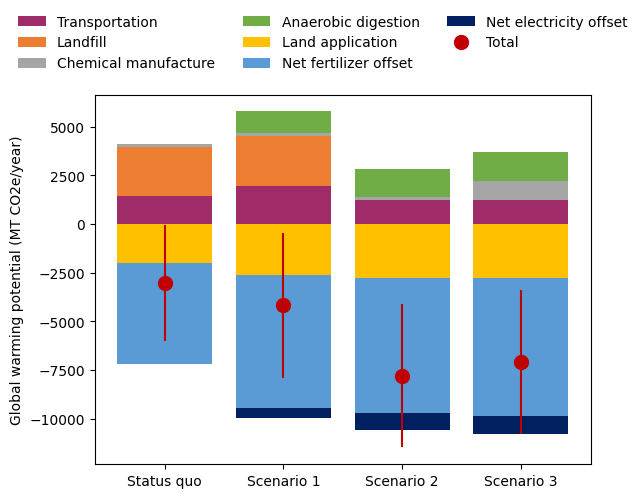

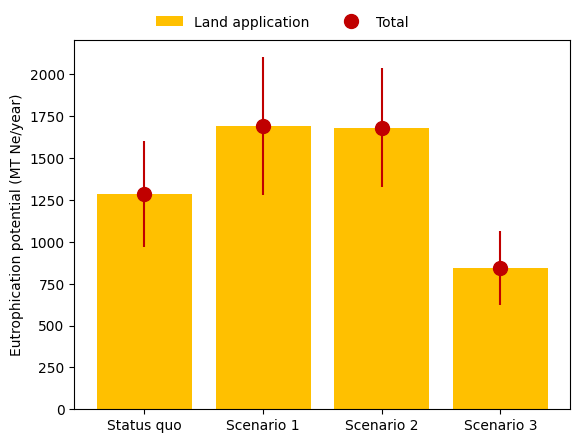

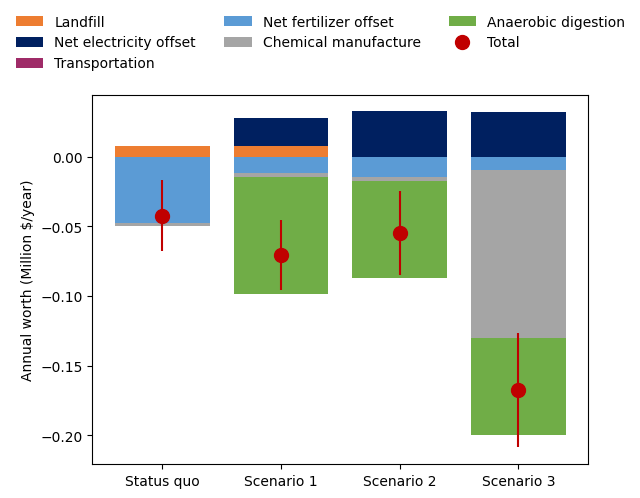

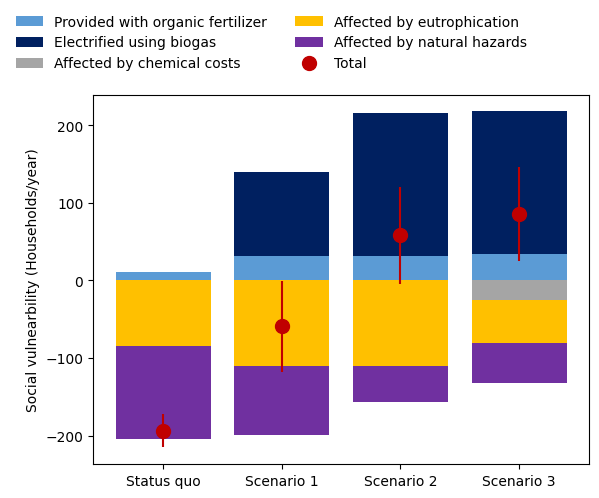

In [ ]:
# Developing scenarios

# Status quo
LF0 = landfill(LF_FW, LF_PW, LF_YW, LF_WW, LF_MSS, LF_dist)
LA0 = landapply(LA_MSShay, LA_PLhay, LA_PLcorn, LA_PLtrans, LA_CMhay, LA_MSShay_dist, LA_PLcorn_dist, LA_PLtrans_dist, 0)
# GWP (MT CO2e/year)
E0_transport = LF0['Transportation (MT CO2e/year)'].values + LA0['Transportation (MT CO2e/year)'].values
E0_landfill = LF0['Landfilling (MT CO2e/year)'].values
E0_chemicals = LA0['Chemical manufacturing (MT CO2e/year)'].values
E0_landapply = LA0['Land application (MT CO2e/year)'].values
E0_fertoffset = LA0['Net fertilizer offset (MTCO2e/year)'].values
E0 = E0_transport + E0_landfill + E0_chemicals + E0_landapply + E0_fertoffset
# Eutrophication (MT Ne/year)
P0 = LA0['Eutrophication (MT Ne/year)'].values
# Net cash flow (Million $/year)
CF0_transport = LF0['Transportation ($/year)'].values/1000000 + LA0['Transportation ($/year)'].values/1000000
CF0_landfill = LF0['Landfilling ($/year)'].values/1000000
CF0_chemicals = LA0['Chemical manufacturing ($/year)'].values/1000000
CF0_fertoffset = LA0['Net fertilizer offset ($/year)'].values/1000000
CF0 = CF0_transport + CF0_landfill + CF0_chemicals + CF0_fertoffset
# Benefitted (+) or affected (-) vulnerable households and farms (HH/year)
HH0_GWP = -HH_GWP
HH0_eutrophication = -HH_eutrophication
HH0_chemicals = -LA0['Chemical manufacturing (HH/year)'].values
HH0_fertoffset = LA0['Net fertilizer offset (HH/year)'].values
HH0 = HH0_GWP + HH0_eutrophication + HH0_chemicals + HH0_fertoffset

# Scenario 1
LF1 = landfill(LF_FW, LF_PW, LF_YW, LF_WW, LF_MSS, LF_dist)
LA1 = landapply(LA_MSShay, LA_PLhay, LA_PLcorn, 0, LA_CMhay, LA_MSShay_dist, LA_PLcorn_dist, 0, 0)
AD1 = anaerobicdigestion(0, 0, 0, 0, 0, LA_PLtrans, AD_dist, 0)
# GWP (MT CO2e/year)
E1_transport = LF1['Transportation (MT CO2e/year)'].values + LA1['Transportation (MT CO2e/year)'].values + AD1['Transportation (MT CO2e/year)'].values
E1_landfill = LF1['Landfilling (MT CO2e/year)'].values
E1_chemicals = LA1['Chemical manufacturing (MT CO2e/year)'].values + AD1['Chemical manufacturing (MT CO2e/year)'].values
E1_landapply = LA1['Land application (MT CO2e/year)'].values + AD1['Land application (MT CO2e/year)'].values
E1_fertoffset = LA1['Net fertilizer offset (MTCO2e/year)'].values + AD1['Net fertilizer offset (MT CO2e/year)'].values
E1_anaerobicdigestion = AD1['Anaerobic digestion (MT CO2e/year)'].values
E1_elecoffset = AD1['Net electricity offset (MT CO2e/year)'].values
E1 = E1_transport + E1_landfill + E1_chemicals + E1_landapply + E1_fertoffset + E1_anaerobicdigestion + E1_elecoffset
# Eutrophication (MT Ne/year)
P1 = LA1['Eutrophication (MT Ne/year)'].values + AD1['Eutrophication (MT Ne/year)'].values
# Net cash flow (Million $/year)
CF1_transport = LF1['Transportation ($/year)'].values/1000000 + LA1['Transportation ($/year)'].values/1000000 + AD1['Transportation ($/year)'].values/1000000
CF1_landfill = LF1['Landfilling ($/year)'].values/1000000
CF1_chemicals = LA1['Chemical manufacturing ($/year)'].values/1000000 + AD1['Chemical manufacturing ($/year)'].values/1000000
CF1_fertoffset = AD1['Net fertilizer offset ($/year)'].values/1000000
CF1_anaerobicdigestion = AD1['Anaerobic digestion ($/year)'].values/1000000
CF1_elecoffset = AD1['Net electricity offset ($/year)'].values/1000000
CF1 = CF1_transport + CF1_landfill + CF1_chemicals + CF1_fertoffset + CF1_anaerobicdigestion + CF1_elecoffset
# Benefitted (+) or affected (-) vulnerable households and farms (HH/year)
HH1_GWP = -HH_GWP * (E0.mean()/E1.mean())
HH1_eutrophication = -HH_eutrophication * (P1.mean()/P0.mean())
HH1_chemicals = -AD1['Chemical manufacturing (HH/year)'].values
HH1_fertoffset = LA1['Net fertilizer offset (HH/year)'].values + AD1['Net fertilizer offset (HH/year)'].values
HH1_elecoffset = AD1['Net electricity offset (HH/year)'].values
HH1 = HH1_GWP + HH1_eutrophication + HH1_chemicals + HH1_fertoffset + HH1_elecoffset

# Scenario 2
LA2 = landapply(LA_MSShay, LA_PLhay, LA_PLcorn, 0, LA_CMhay, LA_MSShay_dist, LA_PLcorn_dist, 0, 0)
AD2 = anaerobicdigestion(LF_FW, LF_PW, LF_YW, LF_WW, LF_MSS, LA_PLtrans, AD_dist, 0)
# GWP (MT CO2e/year)
E2_transport = LA2['Transportation (MT CO2e/year)'].values + AD2['Transportation (MT CO2e/year)'].values
E2_chemicals = LA2['Chemical manufacturing (MT CO2e/year)'].values + AD2['Chemical manufacturing (MT CO2e/year)'].values
E2_landapply = LA2['Land application (MT CO2e/year)'].values + AD2['Land application (MT CO2e/year)'].values
E2_fertoffset = LA2['Net fertilizer offset (MTCO2e/year)'].values + AD2['Net fertilizer offset (MT CO2e/year)'].values
E2_anaerobicdigestion = AD2['Anaerobic digestion (MT CO2e/year)'].values
E2_elecoffset = AD2['Net electricity offset (MT CO2e/year)'].values
E2 = E2_transport + E2_chemicals + E2_landapply + E2_fertoffset + E2_anaerobicdigestion + E2_elecoffset
# Eutrophication (MT Ne/year)
P2 = LA2['Eutrophication (MT Ne/year)'].values + AD2['Eutrophication (MT Ne/year)'].values
# Net cash flow (Million $/year)
CF2_transport = LA2['Transportation ($/year)'].values/1000000 + AD2['Transportation ($/year)'].values/1000000
CF2_chemicals = LA2['Chemical manufacturing ($/year)'].values/1000000 + AD2['Chemical manufacturing ($/year)'].values/1000000
CF2_fertoffset = AD2['Net fertilizer offset ($/year)'].values/1000000
CF2_anaerobicdigestion = AD2['Anaerobic digestion ($/year)'].values/1000000
CF2_elecoffset = AD2['Net electricity offset ($/year)'].values/1000000
CF2 = CF2_transport + CF2_chemicals + CF2_fertoffset + CF2_anaerobicdigestion + CF2_elecoffset
# Benefitted (+) or affected (-) vulnerable households and farms (HH/year)
HH2_GWP = -HH_GWP * (E0.mean()/E2.mean())
HH2_eutrophication = -HH_eutrophication * (P2.mean()/P0.mean())
HH2_chemicals = -AD2['Chemical manufacturing (HH/year)'].values
HH2_fertoffset = LA2['Net fertilizer offset (HH/year)'].values + AD2['Net fertilizer offset (HH/year)'].values
HH2_elecoffset = AD2['Net electricity offset (HH/year)'].values
HH2 = HH2_GWP + HH2_eutrophication + HH2_chemicals + HH2_fertoffset + HH2_elecoffset

# Scenario 3
LA3 = landapply(LA_MSShay, LA_PLhay, LA_PLcorn, 0, LA_CMhay, LA_MSShay_dist, LA_PLcorn_dist, 0, 1)
AD3 = anaerobicdigestion(LF_FW, LF_PW, LF_YW, LF_WW, LF_MSS, LA_PLtrans, AD_dist, 1)
# GWP (MT CO2e/year)
E3_transport = LA3['Transportation (MT CO2e/year)'].values + AD3['Transportation (MT CO2e/year)'].values
E3_chemicals = LA3['Chemical manufacturing (MT CO2e/year)'].values + AD3['Chemical manufacturing (MT CO2e/year)'].values
E3_landapply = LA3['Land application (MT CO2e/year)'].values + AD3['Land application (MT CO2e/year)'].values
E3_fertoffset = LA3['Net fertilizer offset (MTCO2e/year)'].values + AD3['Net fertilizer offset (MT CO2e/year)'].values
E3_anaerobicdigestion = AD3['Anaerobic digestion (MT CO2e/year)'].values
E3_elecoffset = AD3['Net electricity offset (MT CO2e/year)'].values
E3 = E3_transport + E3_chemicals + E3_landapply + E3_fertoffset + E3_anaerobicdigestion + E3_elecoffset
# Eutrophication (MT Ne/year)
P3 = LA3['Eutrophication (MT Ne/year)'].values + AD3['Eutrophication (MT Ne/year)'].values
# Net cash flow (Million $/year)
CF3_transport = LA3['Transportation ($/year)'].values/1000000 + AD3['Transportation ($/year)'].values/1000000
CF3_chemicals = LA3['Chemical manufacturing ($/year)'].values/1000000 + AD3['Chemical manufacturing ($/year)'].values/1000000
CF3_fertoffset = AD3['Net fertilizer offset ($/year)'].values/1000000
CF3_anaerobicdigestion = AD3['Anaerobic digestion ($/year)'].values/1000000
CF3_elecoffset = AD3['Net electricity offset ($/year)'].values/1000000
CF3 = CF3_transport + CF3_chemicals + CF3_fertoffset + CF3_anaerobicdigestion + CF3_elecoffset
# Benefitted (+) or affected (-) vulnerable households and farms (HH/year)
HH3_GWP = -HH_GWP * (E0.mean()/E3.mean())
HH3_eutrophication = -HH_eutrophication * (P3.mean()/P0.mean())
HH3_chemicals = -AD3['Chemical manufacturing (HH/year)'].values
HH3_fertoffset = LA3['Net fertilizer offset (HH/year)'].values + AD3['Net fertilizer offset (HH/year)'].values
HH3_elecoffset = AD3['Net electricity offset (HH/year)'].values
HH3 = HH3_GWP + HH3_eutrophication + HH3_chemicals + HH3_fertoffset + HH3_elecoffset

# GWP scenario comparison
GWP_transport = np.array([E0_transport.mean(), E1_transport.mean(), E2_transport.mean(), E3_transport.mean()])
GWP_landfill = np.array([E0_landfill.mean(), E1_landfill.mean(), 0, 0])
GWP_chemicals = np.array([E0_chemicals.mean(), E1_chemicals.mean(), E2_chemicals.mean(), E3_chemicals.mean()])
GWP_landapply = np.array([E0_landapply.mean(), E1_landapply.mean(), E2_landapply.mean(), E3_landapply.mean()])
GWP_fertoffset = np.array([E0_fertoffset.mean(), E1_fertoffset.mean(), E2_fertoffset.mean(), E3_fertoffset.mean()])
GWP_anaerobicdigestion = np.array([0, E1_anaerobicdigestion.mean(), E2_anaerobicdigestion.mean(), E3_anaerobicdigestion.mean()])
GWP_elecoffset = np.array([0, E1_elecoffset.mean(), E2_elecoffset.mean(), E3_elecoffset.mean()])
GWP_total = np.array([E0.mean(), E1.mean(), E2.mean(), E3.mean()])
GWP_error = np.array([E0.std(), E1.std(), E2.std(), E3.std()])

s = ['Status quo', 'Scenario 1', 'Scenario 2', 'Scenario 3']
plt.bar(s, GWP_transport, color = '#9F2B68')
plt.bar(s, GWP_landfill, bottom = GWP_transport, color ='#ED7D31')
plt.bar(s, GWP_chemicals, bottom = GWP_transport + GWP_landfill, color ='#A5A5A5')
plt.bar(s, GWP_anaerobicdigestion, bottom = GWP_transport + GWP_landfill + GWP_chemicals, color ='#70AD47')
plt.bar(s, GWP_landapply, color ='#FFC000')
plt.bar(s, GWP_fertoffset, bottom = GWP_landapply, color ='#5B9BD5')
plt.bar(s, GWP_elecoffset, bottom = GWP_landapply + GWP_fertoffset, color ='#002060')
plt.errorbar(s, GWP_total, GWP_error, marker = 'o', markersize = 10, ls='none', color ='#C00000')
plt.ylabel("Global warming potential (MT CO2e/year)")
plt.legend(["Transportation", "Landfill", "Chemical manufacture", "Anaerobic digestion", "Land application", "Net fertilizer offset", "Net electricity offset", "Total"],bbox_to_anchor=(1.1, 1.25), loc='upper right', ncol = 3, frameon = False)
plt.savefig("GWP.png",dpi = 300, bbox_inches = 'tight')
plt.show()

# Eutrophication scenario comparison
EP_landapply = np.array([P0.mean(), P1.mean(), P2.mean(), P3.mean()])
EP_total = np.array([P0.mean(), P1.mean(), P2.mean(), P3.mean()])
EP_error = np.array([P0.std(), P1.std(), P2.std(), P3.std()])

s = ['Status quo', 'Scenario 1', 'Scenario 2', 'Scenario 3']
plt.bar(s, EP_landapply, color ='#FFC000')
plt.errorbar(s, EP_total, EP_error, marker = 'o', markersize = 10, ls='none', color ='#C00000')
plt.ylabel("Eutrophication potential (MT Ne/year)")
plt.legend(["Land application", "Total"],bbox_to_anchor=(0.7, 1.1), loc='upper right', ncol = 3, frameon = False)
plt.savefig('EP.png', bbox_inches = 'tight')
plt.show()

# Net cash flow scenario comparison
NCF_transport = np.array([CF0_transport.mean(), CF1_transport.mean(), CF2_transport.mean(), CF3_transport.mean()])
NCF_landfill = np.array([CF0_landfill.mean(), CF1_landfill.mean(), 0, 0])
NCF_chemicals = np.array([CF0_chemicals.mean(), CF1_chemicals.mean(), CF2_chemicals.mean(), CF3_chemicals.mean()])
NCF_fertoffset = np.array([CF0_fertoffset.mean(), CF1_fertoffset.mean(), CF2_fertoffset.mean(), CF3_fertoffset.mean()])
NCF_anaerobicdigestion = np.array([0, CF1_anaerobicdigestion.mean(), CF2_anaerobicdigestion.mean(), CF3_anaerobicdigestion.mean()])
NCF_elecoffset = np.array([0, CF1_elecoffset.mean(), CF2_elecoffset.mean(), CF3_elecoffset.mean()])
NCF_total = np.array([CF0.mean(), CF1.mean(), CF2.mean(), CF3.mean()])
NCF_error = np.array([CF0.std(), CF1.std(), CF2.std(), CF3.std()])

s = ['Status quo', 'Scenario 1', 'Scenario 2', 'Scenario 3']
plt.bar(s, NCF_landfill, color ='#ED7D31')
plt.bar(s, NCF_elecoffset, bottom = NCF_landfill, color ='#002060')
plt.bar(s, NCF_transport, color = '#9F2B68')
plt.bar(s, NCF_fertoffset, bottom = NCF_transport, color ='#5B9BD5')
plt.bar(s, NCF_chemicals, bottom = NCF_transport + NCF_fertoffset, color ='#A5A5A5')
plt.bar(s, NCF_anaerobicdigestion, bottom = NCF_transport + NCF_fertoffset + NCF_chemicals, color ='#70AD47')
plt.errorbar(s, NCF_total, NCF_error, marker = 'o', markersize = 10, ls='none', color ='#C00000')
plt.ylabel("Annual worth (Million $/year)")
plt.legend(["Landfill", "Net electricity offset", "Transportation", "Net fertilizer offset", "Chemical manufacture", "Anaerobic digestion", "Total"],bbox_to_anchor=(1.1, 1.25), loc='upper right', ncol = 3, frameon = False)
plt.savefig("NCF.png",dpi = 300, bbox_inches = 'tight')
plt.show()

# Vulnerable households scenario comparison
HH_naturalhazards = np.array([HH0_GWP.mean(), HH1_GWP.mean(), HH2_GWP.mean(), HH3_GWP.mean()])
HH_landapply = np.array([HH0_eutrophication.mean(), HH1_eutrophication.mean(), HH2_eutrophication.mean(), HH3_eutrophication.mean()])
HH_chemicals = np.array([HH0_chemicals.mean(), HH1_chemicals.mean(), HH2_chemicals.mean(), HH3_chemicals.mean()])
HH_fertoffset = np.array([HH0_fertoffset.mean(), HH1_fertoffset.mean(), HH2_fertoffset.mean(), HH3_fertoffset.mean()])
HH_elecoffset = np.array([0, HH1_elecoffset.mean(), HH2_elecoffset.mean(), HH3_elecoffset.mean()])
HH_total = np.array([HH0.mean(), HH1.mean(), HH2.mean(), HH3.mean()])
HH_error = np.array([HH0.std(), HH1.std(), HH2.std(), HH3.std()])

s = ['Status quo', 'Scenario 1', 'Scenario 2', 'Scenario 3']
plt.bar(s, HH_fertoffset, color ='#5B9BD5')
plt.bar(s, HH_elecoffset, bottom = HH_fertoffset, color ='#002060')
plt.bar(s, HH_chemicals, color ='#A5A5A5')
plt.bar(s, HH_landapply, bottom = HH_chemicals, color ='#FFC000')
plt.bar(s, HH_naturalhazards, bottom = HH_chemicals + HH_landapply, color ='#7030A0')
plt.errorbar(s, HH_total, HH_error, marker = 'o', markersize = 10, ls='none', color ='#C00000')
plt.ylabel("Social vulnearbility (Households/year)")
plt.legend(["Provided with organic fertilizer", "Electrified using biogas", "Affected by chemical costs", "Affected by eutrophication", "Affected by natural hazards", "Total"],bbox_to_anchor=(0.9, 1.25), loc='upper right', ncol = 2, frameon = False)
plt.savefig("SVA.png",dpi = 300, bbox_inches = 'tight')
plt.show()

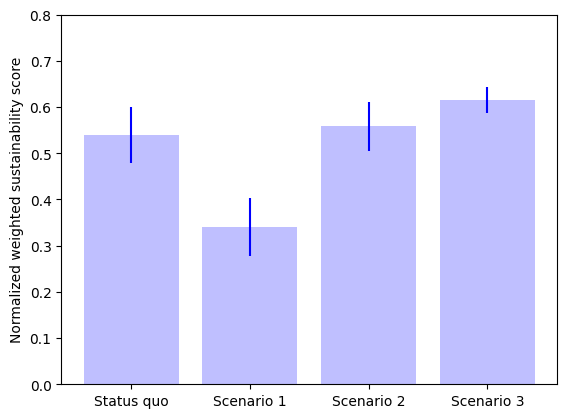

[0 1 2 3]


In [ ]:
# Comparison of scenarios based on sustainability scores
# Normalizing GWP
E_all = np.array([E0, E1, E2, E3])
E0_norm = (E0 - np.max(E_all, axis = 0))/(np.min(E_all, axis = 0) - np.max(E_all, axis = 0))
E1_norm = (E1 - np.max(E_all, axis = 0))/(np.min(E_all, axis = 0) - np.max(E_all, axis = 0))
E2_norm = (E2 - np.max(E_all, axis = 0))/(np.min(E_all, axis = 0) - np.max(E_all, axis = 0))
E3_norm = (E3 - np.max(E_all, axis = 0))/(np.min(E_all, axis = 0) - np.max(E_all, axis = 0))

# Normalizing eutrophication potential
P_all = np.array([P0, P1, P2, P3])
P0_norm = (P0 - np.max(P_all, axis = 0))/(np.min(P_all, axis = 0) - np.max(P_all, axis = 0))
P1_norm = (P1 - np.max(P_all, axis = 0))/(np.min(P_all, axis = 0) - np.max(P_all, axis = 0))
P2_norm = (P2 - np.max(P_all, axis = 0))/(np.min(P_all, axis = 0) - np.max(P_all, axis = 0))
P3_norm = (P3 - np.max(P_all, axis = 0))/(np.min(P_all, axis = 0) - np.max(P_all, axis = 0))

# Normalizing annual net cash flow
CF_all = np.array([CF0, CF1, CF2, CF3])
CF0_norm = (np.min(CF_all, axis = 0) - CF0)/(np.min(CF_all, axis = 0) - np.max(CF_all, axis = 0))
CF1_norm = (np.min(CF_all, axis = 0) - CF1)/(np.min(CF_all, axis = 0) - np.max(CF_all, axis = 0))
CF2_norm = (np.min(CF_all, axis = 0) - CF2)/(np.min(CF_all, axis = 0) - np.max(CF_all, axis = 0))
CF3_norm = (np.min(CF_all, axis = 0) - CF3)/(np.min(CF_all, axis = 0) - np.max(CF_all, axis = 0))

# Normalizing social vulnerability
HH_all = np.array([HH0, HH1, HH2, HH3])
HH0_norm = (np.min(HH_all, axis = 0) - HH0)/(np.min(HH_all, axis = 0) - np.max(HH_all, axis = 0))
HH1_norm = (np.min(HH_all, axis = 0) - HH1)/(np.min(HH_all, axis = 0) - np.max(HH_all, axis = 0))
HH2_norm = (np.min(HH_all, axis = 0) - HH2)/(np.min(HH_all, axis = 0) - np.max(HH_all, axis = 0))
HH3_norm = (np.min(HH_all, axis = 0) - HH3)/(np.min(HH_all, axis = 0) - np.max(HH_all, axis = 0))

# Sustainability score calculation (community weighting)
SS0 = E0_norm * 0.20 + P0_norm * 0.40 + CF0_norm * 0.35 + HH0_norm * 0.05
SS1 = E1_norm * 0.20 + P1_norm * 0.40 + CF1_norm * 0.35 + HH1_norm * 0.05
SS2 = E2_norm * 0.20 + P2_norm * 0.40 + CF2_norm * 0.35 + HH2_norm * 0.05
SS3 = E3_norm * 0.20 + P3_norm * 0.40 + CF3_norm * 0.35 + HH3_norm * 0.05

SS_mean = [SS0.mean(), SS1.mean(), SS2.mean(), SS3.mean()]
SS_std = [SS0.std(), SS1.std(), SS2.std(), SS3.std()]

plt.bar(np.arange(len(SS_mean)), SS_mean, color = 'blue', alpha = 0.25)
plt.errorbar(np.arange(len(SS_mean)), SS_mean, SS_std, marker = '', markersize = 10, ls = 'none', color ='blue')
plt.ylim([0, 0.8])
plt.xticks([0, 1, 2, 3], ['Status quo', 'Scenario 1', 'Scenario 2', 'Scenario 3'])
plt.ylabel("Normalized weighted sustainability score")
plt.savefig("SS.png",dpi = 300, bbox_inches = 'tight')
plt.show()

print(np.arange(len(SS_mean)))

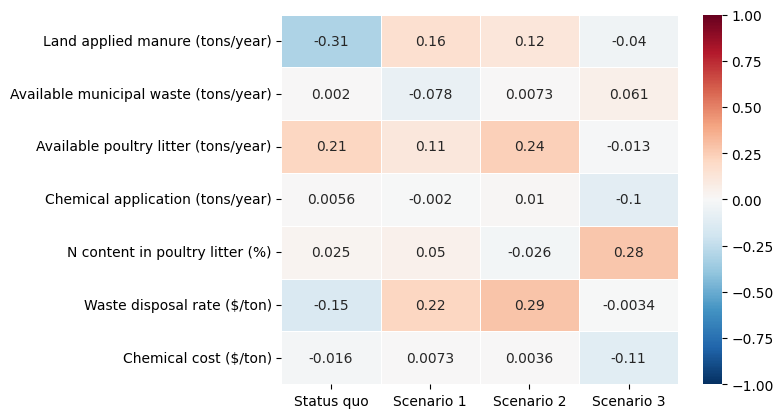

In [ ]:
# Senstivity analysis
LA_sens = [spearmanr(SS0, LA_MSShay + LA_PLhay + LA_PLcorn + LA_CMhay)[0], spearmanr(SS1, LA_MSShay + LA_PLhay + LA_PLcorn + LA_CMhay)[0], spearmanr(SS2, LA_MSShay + LA_PLhay + LA_PLcorn + LA_CMhay)[0], spearmanr(SS3, LA_MSShay + LA_PLhay + LA_PLcorn + LA_CMhay)[0]]
MSW_sens = [spearmanr(SS0, LF_FW + LF_PW + LF_YW + LF_WW + LF_MSS)[0], spearmanr(SS1, LF_FW + LF_PW + LF_YW + LF_WW + LF_MSS)[0], spearmanr(SS2, LF_FW + LF_PW + LF_YW + LF_WW + LF_MSS)[0], spearmanr(SS3, LF_FW + LF_PW + LF_YW + LF_WW + LF_MSS)[0]]
PL_sens = [spearmanr(SS0, LA_PLtrans)[0], spearmanr(SS1 , LA_PLtrans)[0], spearmanr(SS2, LA_PLtrans)[0], spearmanr(SS3, LA_PLtrans)[0]]
Chem_sens = [spearmanr(SS0, Lime_apprate*LA_MSShay)[0], spearmanr(SS1, Lime_apprate*LA_MSShay)[0], spearmanr(SS2, Lime_apprate*LA_MSShay)[0], spearmanr(SS3, Lime_apprate*LA_MSShay + Alum_apprate*LA_PLtrans)[0]]
Chemcost_sens = [spearmanr(SS0, Lime_cost*Lime_apprate)[0], spearmanr(SS1, Lime_cost*Lime_apprate)[0], spearmanr(SS2, Lime_cost*Lime_apprate)[0], spearmanr(SS3, Lime_cost*Lime_apprate + Alum_cost*Alum_apprate)[0]]
N_PL_sens =  [spearmanr(SS0, N_PL)[0], spearmanr(SS1, N_PL)[0], spearmanr(SS2, N_PL)[0], spearmanr(SS3, N_PL * PL_Nimprove_alum)[0]]
Disposalrate_sens = [spearmanr(SS0, LF_disposal_rate + AD_disposal_rate)[0], spearmanr(SS1, LF_disposal_rate + AD_disposal_rate)[0], spearmanr(SS2, LF_disposal_rate + AD_disposal_rate)[0], spearmanr(SS3, LF_disposal_rate + AD_disposal_rate)[0]]

rs = pd.DataFrame({'Land applied manure (tons/year)': LA_sens,
                   'Available municipal waste (tons/year)': MSW_sens,
                   'Available poultry litter (tons/year)': PL_sens,
                   'Chemical application (tons/year)': Chem_sens,
                   'N content in poultry litter (%)': N_PL_sens,
                   'Waste disposal rate ($/ton)': Disposalrate_sens,
                   'Chemical cost ($/ton)': Chemcost_sens},
                   index = ['Status quo', 'Scenario 1', 'Scenario 2', 'Scenario 3'])

ax = sns.heatmap(rs.T, linewidth=0.5, cmap='RdBu_r', vmin=-1, vmax=1, annot=True)
plt.savefig("Sens.png",dpi = 300, bbox_inches = 'tight')
plt.show()